<center><span style="font-size: 20pt;">UE 2 Techniques de visualisation des données</span></center>

<span style="font-size: 14pt; font-style: italic;">Importation des différentes librairies</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from matplotlib.ticker import MultipleLocator
from matplotlib.gridspec import GridSpec
import plotly.io as pio
from IPython.display import FileLink

<span style="font-size: 14pt; font-style: italic;">Importation du jeu de données</span>

In [2]:
# Importation avec le bon encodage
theses=pd.read_csv("\PhD_V3.csv",low_memory=False,header=0,index_col=0,encoding='utf-8')

# Vérification de l'importation en affichant les premières lignes de code
print(len(theses))
theses.head()

448047


Auteur Identifiant auteur  \
0       Saeed Al marri                NaN   
1    Andrea Ramazzotti          174423705   
2  OLIVIER BODENREIDER                NaN   
3       Emmanuel Porte                NaN   
4     Arthur Devriendt                NaN   

                                               Titre  \
0  Le credit documentaire et l'onopposabilite des...   
1  Application de la PGD a la resolution de probl...   
2  Conception d'un outil informatique d'etude des...   
3  Socio-histoire des politiques publiques en mat...   
4  LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...   

                           Directeur de these  \
0                         Philippe Delebecque   
1  Jean-Claude Grandidier,Marianne Beringhier   
2                             Francois Kohler   
3                               Gilles Pollet   
4                               Gabriel Dupuy   

              Directeur de these (nom prenom) Identifiant directeur  \
0                         Delebecque Philippe              29561248   
1  Grandidier Jean-Claude,Beringhier Marianne           715,441,511   
2                             Kohler Francois              57030758   
3                               Pollet Gilles                    na   
4                               Dupuy Gabriel                    na   

                         Etablissement de soutenance  \
0                                            Paris 1   
1  Chasseneuil-du-Poitou, Ecole nationale superie...   
2                                            Nancy 1   
3                                             Lyon 2   
4                                            Paris 1   

  Identifiant etablissement  \
0                  27361802   
1                  28024400   
2                       NaN   
3                 02640334X   
4                  27361802   

                                          Discipline    Statut  ...    Year  \
0                                        Driot prive   enCours  ...     NaN   
1  Mecanique des solides, des materiaux, des stru...   enCours  ...     NaN   
2                                           Medecine  soutenue  ...  1993.0   
3                                  Science politique   enCours  ...     NaN   
4                                         Geographie   enCours  ...     NaN   

  Langue de la these  Identifiant de la these Accessible en ligne  \
0                 na                   s69480                 non   
1                 na                   s98826                 non   
2                 fr             1993NAN19006                 non   
3                 na                   s88867                 non   
4                 na                   s89663                 non   

  Publication dans theses.fr Mise a jour dans theses.fr  \
0                   26-01-12                   26-01-12   
1                   22-11-13                   22-11-13   
2                   24-05-13                   17-11-12   
3                   12-07-13                   12-01-16   
4                   13-07-13                   12-07-13   

              Discipline_prÃ©di   Genre  \
0    Droit et Science Politique    male   
1  Materiaux, Milieux et Chimie  female   
2                      Medecine    male   
3    Droit et Science Politique    male   
4                           SHS    male   

                                   etablissement_rec Langue_rec  
0             Université Paris 1 - Panthéon Sorbonne        NaN  
1  École nationale supérieure de mécanique et d'a...        NaN  
2                             Université de Lorraine   Français  
3                        Université Lumière - Lyon 2        NaN  
4             Université Paris 1 - Panthéon Sorbonne        NaN  

[5 rows x 22 columns]

<span style="font-size: 14pt; font-style: italic;">Corrections sur le jeu de données (caractères spéciaux et duplicates)</span>

In [3]:
# Modification et suppresion des duplicates
theses = theses.drop_duplicates()
theses = theses.rename(columns={'Discipline_prÃ©di': 'Discipline_pred'})

# Modification des intitulés des disciplines
# Définition du dictionnaire de correspondances pour les remplacements
correspondances = {'MathÃ©matiques': 'Mathématiques', 
                   "Science de l'ingÃ©nieur": "Sciences de l'Ingénieur",
                   "Poubelle":"Non défini",
                   "Langues et Litteratures":"Langues et Littératures",
                   "Materiaux, Milieux et Chimie":"Matériaux, Milieux et Chimie",
                   "Mathematiques et Informatique":"Mathématiques et Informatique",
                   "Medecine":"Médecine",
                   "Sciences de l'education":"Sciences de l'Education"}

# Remplacements en utilisant le dictionnaire de correspondances
theses['Discipline_pred'] = theses['Discipline_pred'].replace(correspondances)

# Affichage du nombre de lignes du dataframe
print(len(theses))

# Affichage des premières lignes du dataframe
theses

447635


Auteur Identifiant auteur  \
0                       Saeed Al marri                NaN   
1                    Andrea Ramazzotti          174423705   
2                  OLIVIER BODENREIDER                NaN   
3                       Emmanuel Porte                NaN   
4                     Arthur Devriendt                NaN   
...                                ...                ...   
448041                Jocelyn Poncelet                NaN   
448042                    Emir Roumili                NaN   
448043                   Nesrine Salah                NaN   
448044            Ghulam sakhi Shokouh                NaN   
448046  Helene Labriet (Rouge-labriet)                NaN   

                                                    Titre  \
0       Le credit documentaire et l'onopposabilite des...   
1       Application de la PGD a la resolution de probl...   
2       Conception d'un outil informatique d'etude des...   
3       Socio-histoire des politiques publiques en mat...   
4       LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...   
...                                                   ...   
448041  Definition et gestion centralisee de l'assorti...   
448042  Contribution a la demonstration de surete nucl...   
448043  Modelisation du comportement mecanique des bet...   
448044  Detection et classification d'objets dans des ...   
448046  Developpement de l'imagerie X biomedicale en c...   

                                       Directeur de these  \
0                                     Philippe Delebecque   
1              Jean-Claude Grandidier,Marianne Beringhier   
2                                         Francois Kohler   
3                                           Gilles Pollet   
4                                           Gabriel Dupuy   
...                                                   ...   
448041                                     Jacky Montmain   
448042     Vincent Chapurlat,Nicolas Daclin,Jerome Tixier   
448043  Anne-Sophie Caro,Moulay Said El Youssoufi,Etie...   
448044               Philippe Montesinos,Baptiste Magnier   
448046                       Sylvain Bohic,Barbara Fayard   

                          Directeur de these (nom prenom)  \
0                                     Delebecque Philippe   
1              Grandidier Jean-Claude,Beringhier Marianne   
2                                         Kohler Francois   
3                                           Pollet Gilles   
4                                           Dupuy Gabriel   
...                                                   ...   
448041                                     Montmain Jacky   
448042     Chapurlat Vincent,Daclin Nicolas,Tixier Jerome   
448043  Caro Anne-Sophie,El Youssoufi Moulay Said,Mala...   
448044               Montesinos Philippe,Magnier Baptiste   
448046                       Bohic Sylvain,Fayard Barbara   

       Identifiant directeur  \
0                   29561248   
1                715,441,511   
2                   57030758   
3                         na   
4                         na   
...                      ...   
448041              97727776   
448042                     1   
448043             13905927X   
448044           156,614,561   
448046             112663249   

                              Etablissement de soutenance  \
0                                                 Paris 1   
1       Chasseneuil-du-Poitou, Ecole nationale superie...   
2                                                 Nancy 1   
3                                                  Lyon 2   
4                                                 Paris 1   
...                                                   ...   
448041                                     IMT Mines Ales   
448042                                     IMT Mines Ales   
448043                                     IMT Mines Ales   
448044                                     IMT Mines Ales   
448046                  Universite Grenoble 

<span style="font-size: 14pt;"><b>Exercice 1:</b> Stacked area plot et stacked bar chart</span>

In [4]:
# Sélection des colonnes d'intéret
ex1=theses[["Year","Discipline_pred"]]

# Suppression des années NA
ex1=ex1.dropna()

# Transformation de la colonne "Year" en valeur entière
ex1["Year"]=ex1["Year"].astype(int)

# Sélection des années 1985 à 2018
ex1=ex1[(ex1["Year"]>=1985)&(ex1["Year"]<=2018)]

# Affichage du dataframe obtenu
ex1

Year               Discipline_pred
2       1993                      Médecine
5       2008    Droit et Science Politique
6       2005    Droit et Science Politique
7       2009    Droit et Science Politique
8       2013                      Biologie
...      ...                           ...
447999  2018                      Biologie
448000  2015  Matériaux, Milieux et Chimie
448015  2018                      Biologie
448025  2018                      Biologie
448031  2018  Matériaux, Milieux et Chimie

[379103 rows x 2 columns]

In [5]:
# Construction d'une colonne "count"
ex1_stacked=ex1.groupby(["Discipline_pred","Year"]).size()
ex1_stacked=ex1_stacked.reset_index(name='count')

# Pivoting de la table pour que les disciplines apparaissent en colonne
ex1_pivot = ex1_stacked.pivot_table(index='Year', columns='Discipline_pred', values='count')

# Affichage du dataframe obtenu
ex1_pivot

Discipline_pred  Biologie  Droit et Science Politique  Economie Gestion  \
Year                                                                      
1985                695.0                       168.0             220.0   
1986                967.0                       400.0             390.0   
1987               1716.0                       413.0             413.0   
1988               1815.0                       374.0             332.0   
1989               1649.0                       378.0             281.0   
1990               1750.0                       370.0             239.0   
1991               1719.0                       384.0             293.0   
1992               1975.0                       381.0             365.0   
1993               2048.0                       435.0             370.0   
1994               2147.0                       531.0             420.0   
1995               2139.0                       492.0             374.0   
1996               2113.0                       575.0             451.0   
1997               2425.0                       595.0             565.0   
1998               2589.0                       659.0             503.0   
1999               3326.0                       700.0             480.0   
2000               3260.0                       865.0             627.0   
2001               2703.0                       699.0             515.0   
2002               2394.0                       715.0             453.0   
2003               2554.0                       699.0             485.0   
2004               2599.0                       792.0             493.0   
2005               2602.0                       727.0             506.0   
2006               2804.0                       743.0             537.0   
2007               3056.0                       745.0             631.0   
2008               3036.0                       761.0             655.0   
2009               3151.0                       744.0             689.0   
2010               3179.0                       821.0             753.0   
2011               3094.0                       850.0             800.0   
2012               3369.0                       882.0             747.0   
2013               3392.0                       881.0             746.0   
2014               3128.0                       902.0             766.0   
2015               3086.0                       795.0             677.0   
2016               3273.0                       731.0             709.0   
2017               3194.0                       751.0             692.0   
2018               3245.0                       701.0             635.0   

Discipline_pred  Informatique  Langues et Littératures  Mathématiques  \
Year                                                                    
1985                     45.0                    268.0          120.0   
1986                     69.0                    415.0          331.0   
1987                    101.0                    646.0          766.0   
1988                    121.0                    457.0          610.0   
1989                    144.0                    415.0          723.0   
1990                    176.0                    457.0          761.0   
1991                    130.0                    463.0          845.0   
1992                    195.0                    525.0          913.0   
1993                    197.0                    564.0          971.0   
1994                    214.0                    703.0         1054.0   
1995                    231.0                    695.0          996.0   
1996                    253.0                    709.0         1117.0   
1997                    275.0                    686.0          973.0   
1998                    218.0                    583.0          736.0   
1999                    218.0                    666.0          305.0   
2000                    250.0                    710.0    

<span style="font-size: 14pt; font-style: italic;"><b>Stacked area plot</b></span>

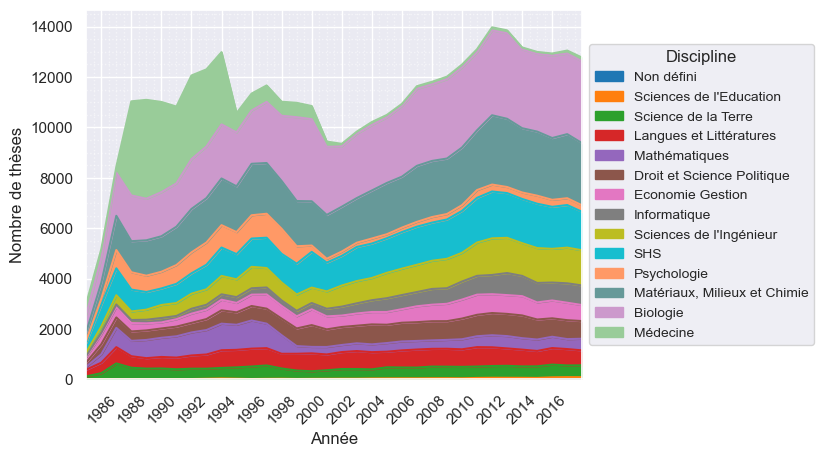

In [6]:
# Choix de la palette de couleurs
sns.set()
palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#ff9966', '#669999', '#cc99cc', '#99cc99', '#ffcc99']

# Créeation du stacked area chart
ex1_pivot = ex1_pivot[["Non défini","Sciences de l'Education",'Science de la Terre','Langues et Littératures','Mathématiques',
                       'Droit et Science Politique','Economie Gestion',"Informatique","Sciences de l'Ingénieur", 'SHS',
                       'Psychologie', 'Matériaux, Milieux et Chimie', 'Biologie','Médecine']]
ex1_pivot.plot.area(color=palette)

# Nom et limites des axes
plt.xlabel('Année')
plt.ylabel('Nombre de thèses')
plt.xticks(range(1984, 2018, 2), rotation=45)
plt.xlim(1985, 2018)

# Mise en forme des axes
plt.minorticks_on() 
plt.grid(which='minor', linestyle=':', alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Discipline', fontsize='small')

# Sauvegarde de la figure
plt.savefig("Nombre de thèses par discipline au fil des années.png", dpi=300, bbox_inches='tight')

# Affichage de la figure
plt.show()

<span style="font-size: 14pt; font-style: italic;"><b>Stacked bar chart</b></span>

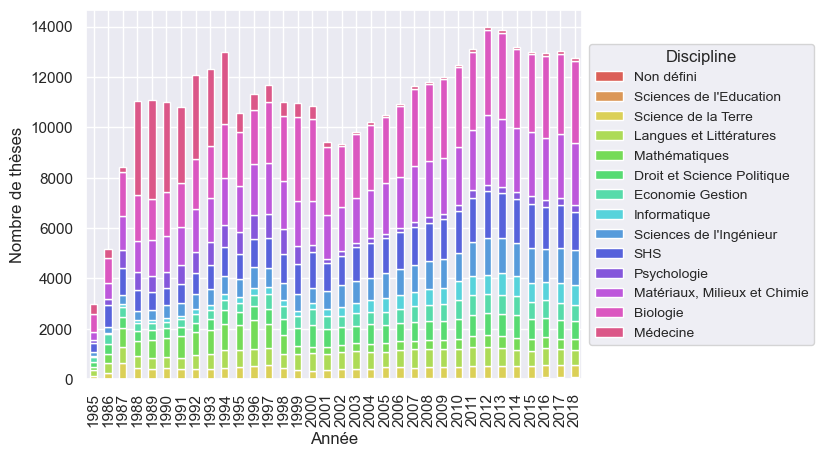

In [7]:
# Palette de couleur personnalisée
palette = sns.color_palette('hls', n_colors=len(ex1_pivot.columns))

# Création du stacked bar chart
ax = ex1_pivot.plot(kind='bar', stacked=True, color=palette)

# Ajout des labels et la légende
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de thèses')
ax.legend(ex1_pivot.columns,title='Discipline',loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Affichage du graphique
plt.show()

<span style="font-size: 14pt;"><b>Exercice 2:</b> Jouer sur la transparence et afficher une grille</span>

In [8]:
# Préparation du jeu de données avec les bons intitulés de colonne
ex2_discip=ex1.groupby(["Discipline_pred"]).size()
ex2_discip=ex2_discip.reset_index(name='Nombre de thèses')
ex2_discip= ex2_discip.rename(columns={'Discipline_pred': 'Discipline'})

# Affichage du dataframe obtenu
ex2_discip

Discipline  Nombre de thèses
0                        Biologie             86192
1      Droit et Science Politique             21659
2                Economie Gestion             17812
3                    Informatique             14219
4         Langues et Littératures             21163
5                   Mathématiques             18411
6   Mathématiques et Informatique               776
7    Matériaux, Milieux et Chimie             65148
8                        Médecine             30296
9                      Non défini               274
10                    Psychologie             15176
11                            SHS             43249
12            Science de la Terre             14316
13        Sciences de l'Education               804
14        Sciences de l'Ingénieur             29608

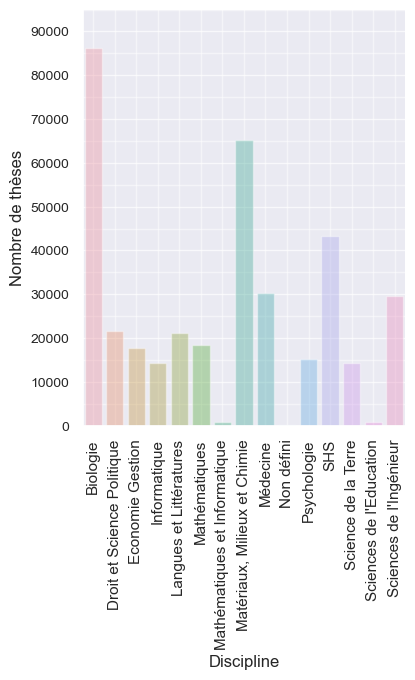

In [9]:
# Graphique et transparence des barres
sns.catplot(x='Discipline', y='Nombre de thèses', kind='bar', data=ex2_discip, alpha=0.4)

# Inclinaison des intitulés des l'axe des x
plt.xticks(rotation=90)

# Propriétés du quadrillage et transparence
plt.grid(visible=True, which='major', axis='x', alpha=0.5)
plt.grid(visible=True, which='major', axis='y',alpha=0.7)
plt.grid(visible=True, which='minor', axis='y',alpha=0.5)
plt.yticks(range(0, 100000, 5000), fontsize=10)
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(10000))
ax.yaxis.set_minor_locator(MultipleLocator(5000))

<span style="font-size: 14pt;"><b>Exercice 3:</b> Distance entre axes et labels</span>

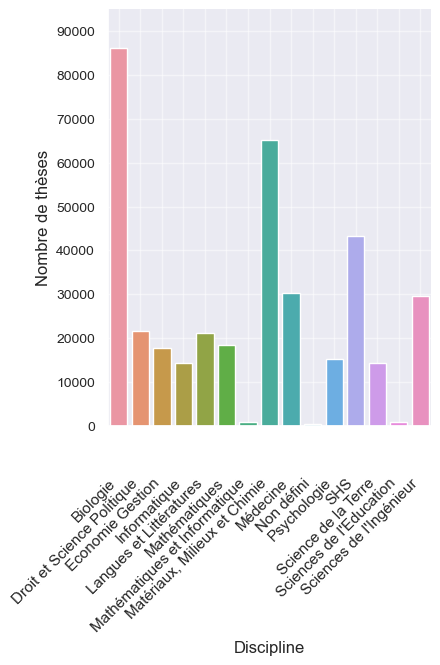

In [10]:
# Création du catplot
sns.catplot(x='Discipline', y='Nombre de thèses', kind='bar', data=ex2_discip)
plt.xticks(rotation=90)
plt.grid(visible=bool, which='both', axis='both',alpha=0.5)
plt.yticks(range(0, 100000, 5000), fontsize=10)
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(10000))

# Rotation de 45° des intitulés de l'axe des x
plt.xticks(rotation=45, ha='right')

# Décollement des intitulés de l'axe des abscisses
ax.tick_params(axis='x', which='major', pad=30)

<span style="font-size: 14pt;"><b>Exercice 4#1:</b> Changer la police et la taille des caractères</span>

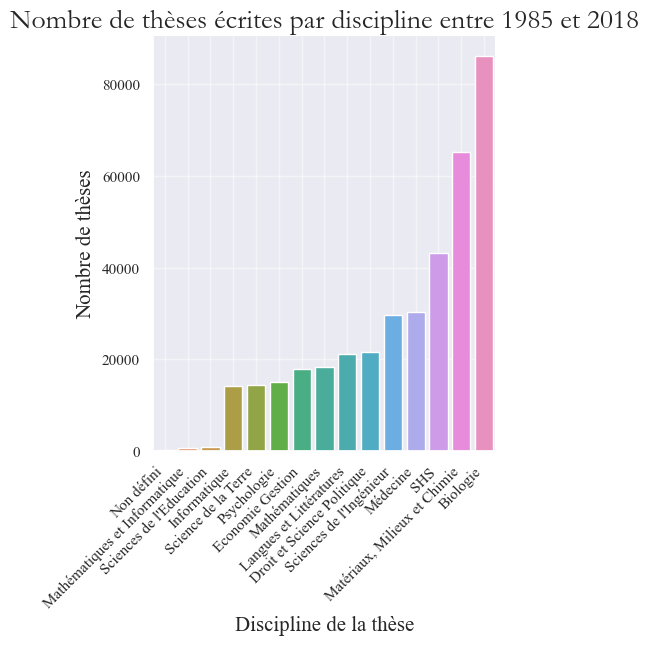

In [11]:
# Modification de la police pour tout le graphique
sns.set(rc={'font.family':'sans-serif', 'font.sans-serif':['Times New Roman']})

# Graphique avec tri des barres de la plus petite à la plus grande valeur de "Nombre de thèses"
sns.catplot(x='Discipline', y='Nombre de thèses', kind='bar', data=ex2_discip.sort_values('Nombre de thèses'))
plt.xticks(rotation=90)
plt.grid(visible=bool, which='both', axis='both',alpha=0.5)
plt.xticks(rotation=45, ha='right')
ax = plt.gca()

# Changement de la taille de la police sur les axes
ax.set_xlabel("Discipline de la thèse", fontsize=15, fontname="Times New Roman")
ax.set_ylabel("Nombre de thèses", fontsize=15, fontname="Times New Roman")

# Changement de la taille et de la police du titre
ax.set_title("Nombre de thèses écrites par discipline entre 1985 et 2018", fontsize=20, fontname="Garamond")

# Sauvegarde de la figure
plt.savefig("Thèses par discipline.png", dpi=300,bbox_inches='tight')

# Affichage du graphique
plt.show()

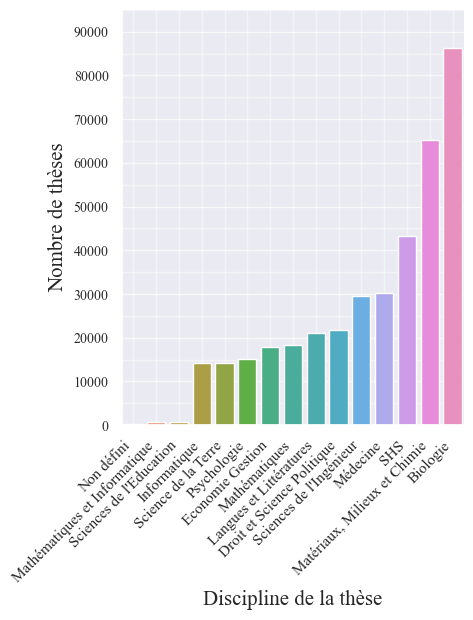

In [12]:
# Même graphique pour export
# Modification de la police pour tout le graphique
sns.set(rc={'font.family':'sans-serif', 'font.sans-serif':['Times New Roman']})

# Graphique avec tri des barres de la plus petite à la plus grande valeur de "Nombre de thèses"
sns.catplot(x='Discipline', y='Nombre de thèses', kind='bar', data=ex2_discip.sort_values('Nombre de thèses'))

# Arrangements du quadrillage
plt.xticks(rotation=90)
plt.grid(visible=bool, which='both', axis='both',alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.grid(visible=True, which='major', axis='x', alpha=0.5)
plt.grid(visible=True, which='major', axis='y',alpha=0.7)
plt.grid(visible=True, which='minor', axis='y',alpha=0.5)
plt.yticks(range(0, 100000, 5000), fontsize=10)
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(10000))
ax.yaxis.set_minor_locator(MultipleLocator(5000))

# Changement de la taille de la police sur les axes
ax.set_xlabel("Discipline de la thèse", fontsize=15, fontname="Times New Roman")
ax.set_ylabel("Nombre de thèses", fontsize=15, fontname="Times New Roman")

# Sauvegarde de la figure
plt.savefig("Thèses par discipline.png", dpi=300,bbox_inches='tight')

# Affichage du graphique
plt.show()

<span style="font-size: 14pt;"><b>Exercice 4#2:</b> Ecraser le graphique en changeant les marges (2 méthodes)</span>

In [13]:
# Création du jeu de données
ex4=theses[["Year"]].dropna()

# Transformation de l'année en nombre entier
ex4["Year"]=ex4["Year"].astype(int)

# Groupby année + reset index
ex4=ex4.groupby(["Year"]).size()
ex4=ex4.reset_index(name='Nombre de thèses')

# Sélection des années 1987 à 2018
ex4=ex4[(ex4["Year"]>=1987)&(ex4["Year"]<=2018)]

# Renommage colonne année
ex4=ex4.rename(columns={'Year': 'Année'})

# Affichage des premières lignes du dataframe créé
ex4.head()

Année  Nombre de thèses
10   1987              8439
11   1988             11045
12   1989             11102
13   1990             11011
14   1991             10831

*Première méthode*

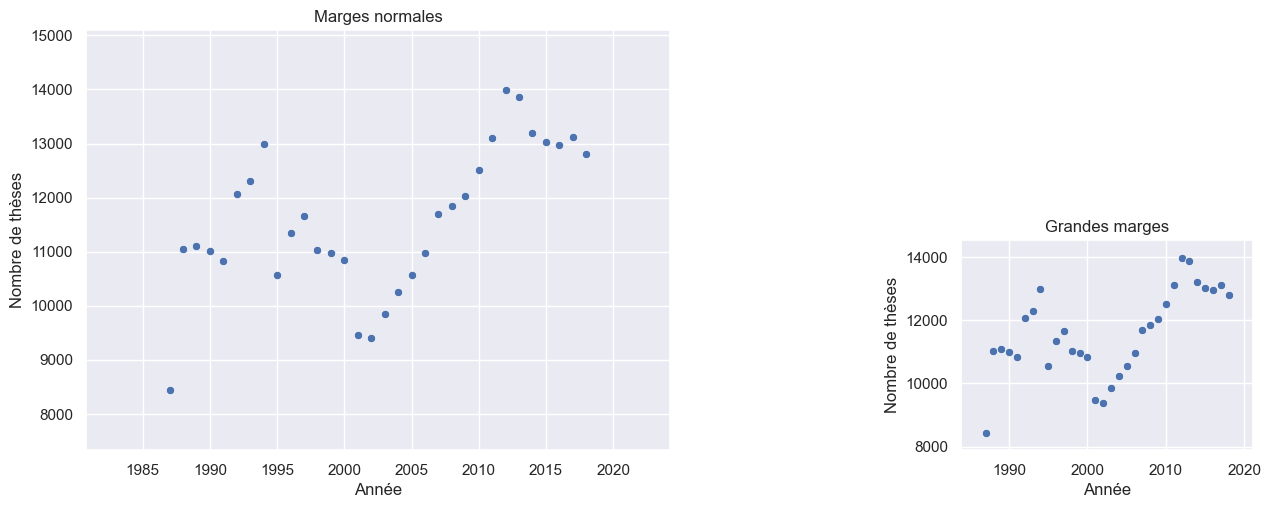

In [14]:
# Création de deux subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
sns.set_style("whitegrid")
plt.subplots_adjust(wspace=0.2)

# Premier subplot avec des marges normales
sns.scatterplot(ax=ax1, data=ex4, x='Année', y='Nombre de thèses')
ax1.set_title('Marges normales')

# Deuxième subplot avec de grandes marges
sns.scatterplot(ax=ax2, data=ex4, x='Année', y='Nombre de thèses')
ax2.set_title('Grandes marges')

# ajuster l'espacement entre les subplots
plt.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9, wspace=0.4)

# Ajustement la taille de s marges
ax1.margins(0.2, 0.2)
ax2.margins(0.1, 0.1)

# Modification de la taille du 2e subplot
box2 = ax2.get_position()
ax2.set_position([box2.x0 + box2.width * 0.1, box2.y0, box2.width * 0.5, box2.height*0.5])

# Affichage de la deuxième figure
plt.show()

*Deuxième méthode*

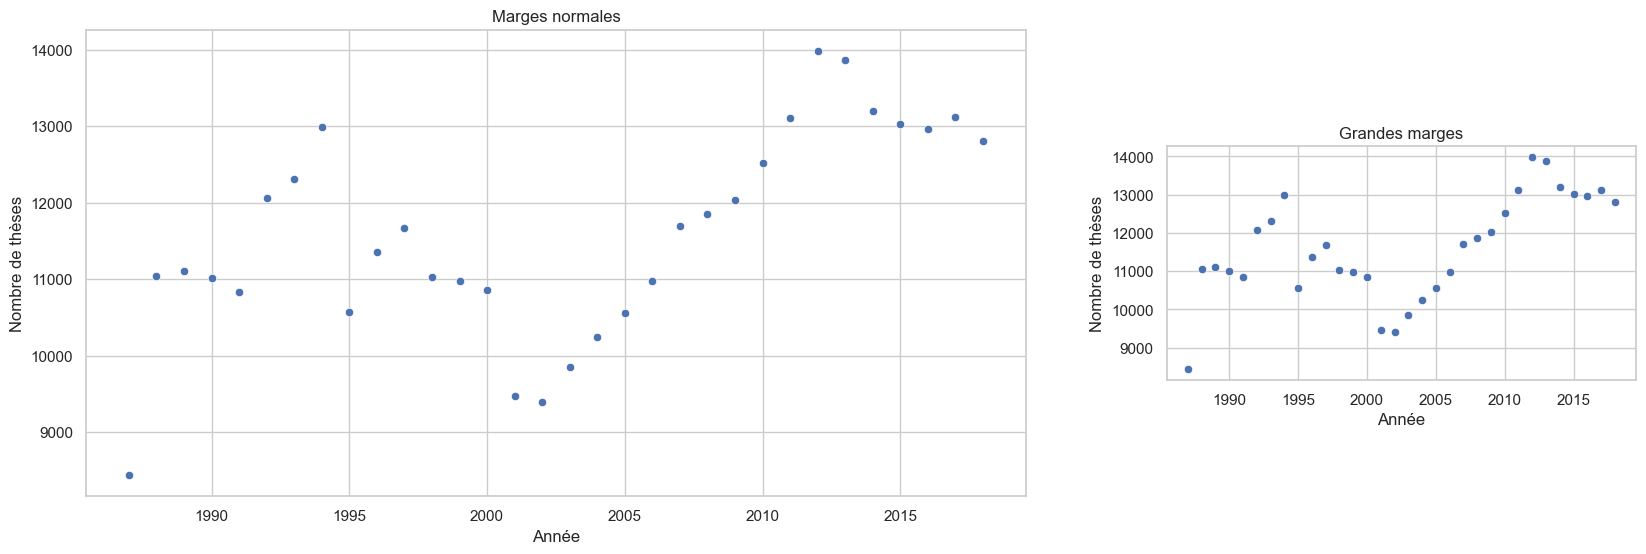

In [15]:
# Création de la grille de sous-graphiques
fig = plt.figure(figsize=(20, 10))
gs = GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 0.5])

# Premier subplot avec des marges normales
ax1 = plt.subplot(gs[0])
sns.scatterplot(ax=ax1, data=ex4, x='Année', y='Nombre de thèses')
ax1.set_title('Marges normales')

# Deuxième subplot avec de grandes marges
ax2 = plt.subplot(gs[1])
sns.scatterplot(ax=ax2, data=ex4, x='Année', y='Nombre de thèses')
ax2.set_title('Grandes marges')

# Ajustement de la position du sous-graphique de droite
bbox = ax2.get_position()
ax2.set_position([bbox.x0, bbox.y0 + 0.25 * bbox.height, bbox.width, 0.5 * bbox.height])

# Affichage de la figure
plt.show()

<span style="font-size: 14pt;"><b>Exercice 5:</b> Transformation en échelle logarithmique</span>

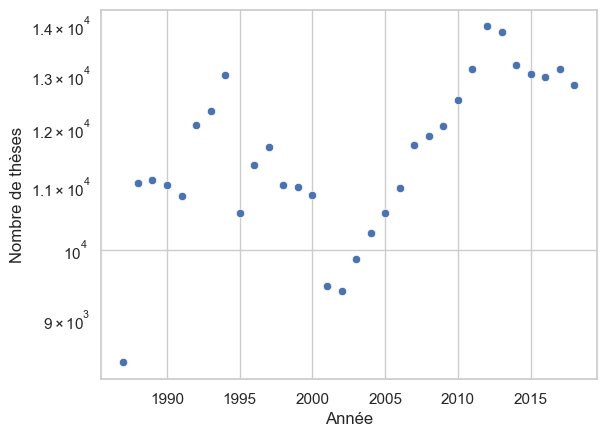

In [16]:
# Création du graphique
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.scatterplot(data=ex4, x='Année', y='Nombre de thèses')

# Modification de l'axe des ordonnées pour qu'il soit en échelle logarithmique
ax.set_yscale('log')

<span style="font-size: 14pt;"><b>Exercice 6:</b> Positionnement de la légende</span>

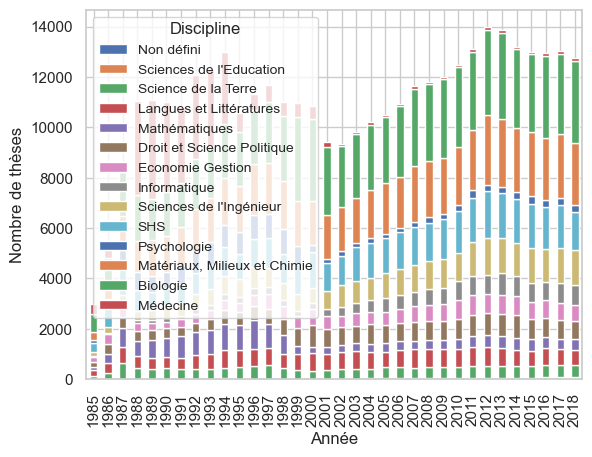

In [17]:
#Légende en haut à gauche
# Création du graphique empilé en barres
ax = ex1_pivot.plot(kind='bar', stacked=True)

# Ajouter les labels et la légende
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de thèses')
ax.legend(ex1_pivot.columns,title='Discipline',loc='upper left', fontsize='small')

# Affichage du graphique
plt.show()

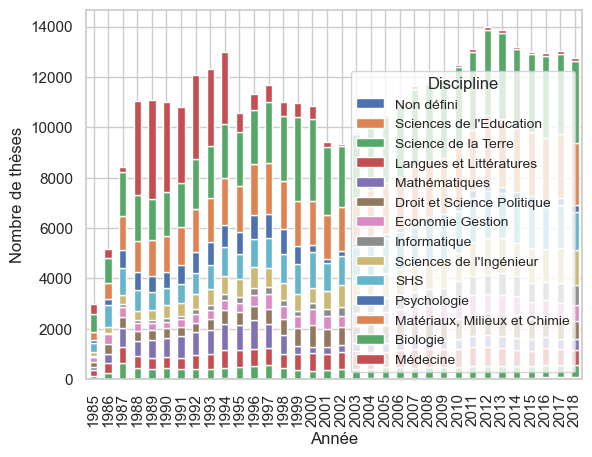

In [18]:
#Légende en bas à droite
# Création graphique empilé en barres
ax = ex1_pivot.plot(kind='bar', stacked=True)

# Ajout des labels et la légende
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de thèses')
ax.legend(ex1_pivot.columns,title='Discipline',loc='lower right', fontsize='small')

# Affichage du graphique
plt.show()

<span style="font-size: 14pt;"><b>Exercice 7:</b> Changement de la palette de couleur (pour une impression en noir et blanc par exemple)</span>

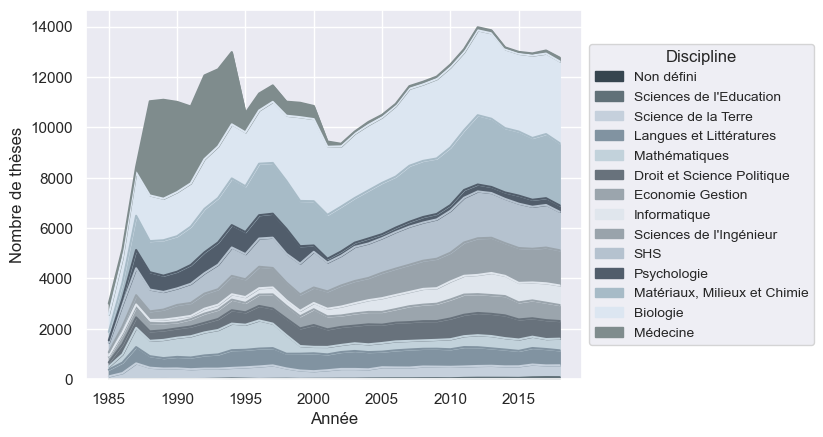

In [19]:
# Paramètres de couleur du graphique
sns.set()
palette = ['#36454f', '#617178', '#c5d0dc', '#8193a1', '#c2d2db','#68727c', '#9ba5ad', 
           '#e0e6ed', '#99a3ab', '#b5c2cf','#515d6b', '#a7bbc7', '#dce6f1', '#7f8c8d', '#b8c7d2']
# Création du graphique
ex1_pivot.plot.area(color=palette)

# Label des axes et légende
plt.xlabel('Année')
plt.ylabel('Nombre de thèses')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Discipline', fontsize='small')

# Affichage du graphique
plt.show()

<span style="font-size: 14pt;"><b>Exercice 8:</b> Modification de l'ordre des disciplines</span>

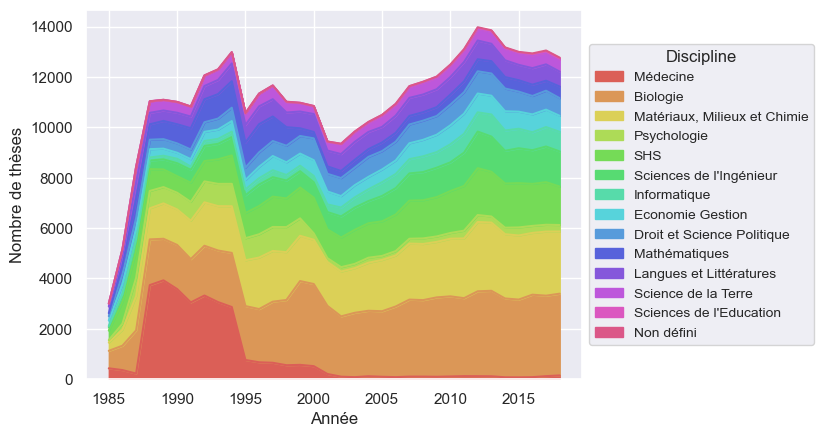

In [20]:
# Paramètres de couleur du graphique
sns.set()
palette = palette = sns.color_palette('hls', n_colors=len(ex1_pivot.columns))

# Inversion de l'ordre des colonnes
ex8_pivot = ex1_pivot.iloc[:, ::-1] 

# Construction du graphique
ex8_pivot.plot.area(color=palette)

# Labels des axes et légende
plt.xlabel('Année')
plt.ylabel('Nombre de thèses')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Discipline', fontsize='small')

# Affichage du graphique
plt.show()

<span style="font-size: 14pt;"><b>Exercice 9:</b> Graphiques interactifs (boutons et slider)</span>

<span style="font-size: 14pt; font-style: italic;"><b>Graphique avec slider</b></span>

In [21]:
# Préparation des données
ex9_slider=theses[["Year","Langue_rec"]]

# Suppresion des lignes vides et transformation de l'année en nombre entier
ex9_slider=ex9_slider.dropna()
ex9_slider["Year"]=ex9_slider["Year"].astype(int)

# Groupby année et langue
ex9_slider=ex9_slider.groupby(['Year','Langue_rec']).size().reset_index(name='Nombre de thèses')

# Renommage colonnes
ex9_slider= ex9_slider.rename(columns={'Year': 'Année', 'Langue_rec': 'Langue'})

# Sélection des années 1987 à 2018
ex9_slider=ex9_slider[(ex9_slider["Année"]>=1987)&(ex9_slider["Année"]<=2018)]

# Affichage du dataframe obtenu
ex9_slider

Année    Langue  Nombre de thèses
16    1987   Anglais                21
17    1987     Autre                 3
18    1987  Bilingue               216
19    1987  Français              8199
20    1988   Anglais                13
..     ...       ...               ...
139   2017  Français              8216
140   2018   Anglais              3429
141   2018     Autre               155
142   2018  Bilingue               741
143   2018  Français              7807

[128 rows x 3 columns]

In [22]:
# Graphique
fig = px.bar(ex9_slider, x="Langue", y="Nombre de thèses", animation_frame="Année",
             animation_group="Langue", range_y=[0,13000],color='Langue',
             category_orders={"Langue": ["Autre", "Bilingue", "Anglais", "Français"]})

# Affichage du graphique
fig.show()

In [23]:
# Sauvegarde de la figure en tant que fichier HTML
pio.write_html(fig, 'Slider_langues.html')

<span style="font-size: 14pt; font-style: italic;"><b>Graphique avec sélector</b></span>

In [24]:
# Sélection des bonnes colonnes et renommage
ex9_selector=ex1_stacked.rename(columns={'Discipline_pred': 'Discipline','Year':'Année','count':'Nombre de thèses'})

# Affichage du dataframe obtenu
ex9_selector

Discipline  Année  Nombre de thèses
0                   Biologie   1985               695
1                   Biologie   1986               967
2                   Biologie   1987              1716
3                   Biologie   1988              1815
4                   Biologie   1989              1649
..                       ...    ...               ...
500  Sciences de l'Ingénieur   2014              1299
501  Sciences de l'Ingénieur   2015              1384
502  Sciences de l'Ingénieur   2016              1337
503  Sciences de l'Ingénieur   2017              1416
504  Sciences de l'Ingénieur   2018              1396

[505 rows x 3 columns]

In [25]:
# Graphique interactif
fig = px.line(ex9_selector, x='Année', y='Nombre de thèses', color='Discipline')

# Création des boutons
date_buttons = [
{'count': 10, 'label': '10 ans', 'step': "year", 'stepmode': "backward"},
{'count': 20, 'label': '20 ans', 'step': "year", 'stepmode': "backward"},
{'count': 35, 'label': '35 ans', 'step': "year", 'stepmode': "backward"}]

# Ajout des boutons et affichage de la figure
fig.update_layout(xaxis=dict(rangeselector=dict(buttons=date_buttons),rangeslider=dict(visible=True),type='date'))
fig.update_layout({'xaxis':{'rangeselector': {'buttons': date_buttons}}})

In [26]:
# Création des traces initiales pour chaque discipline
traces = []
for discipline in ex9_selector['Discipline'].unique():
    ex9_selector_discipline = ex9_selector[ex9_selector['Discipline'] == discipline]
    trace = go.Scatter(
        x=ex9_selector_discipline['Année'],
        y=ex9_selector_discipline['Nombre de thèses'],
        mode='lines',
        name=discipline
    )
    traces.append(trace)

# Création de la figure avec les traces initiales
fig = go.Figure(data=traces)

# Configuration du menu déroulant pour les disciplines
discipline_options = []
for discipline in ex9_selector['Discipline'].unique():
    option = dict(
        label=discipline,
        method="update",
        args=[{"visible": [discipline == trace.name for trace in fig.data]}, {"title": discipline}]
    )
    discipline_options.append(option)

fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            buttons=discipline_options,
            direction="down",
            active=0,
            x=1,  # Ajuster la valeur x pour déplacer le menu vers la gauche
            y=1.15,
        ),
        dict(
            type="buttons",
            buttons=[
                dict(
                    label="Toutes les disciplines",
                    method="update",
                    args=[{"visible": [True] * len(fig.data)}, {"title": "Toutes les disciplines"}]
                )
            ],
            x=0.5,  # Ajuster la valeur x pour déplacer le bouton vers la gauche
            y=1.15,
        ),
    ]
)

fig.update_layout(
    xaxis_title='Année',
    yaxis_title='Nombre de thèses',
    margin=dict(l=100)  # Ajuster la valeur l pour augmenter la marge à gauche de la figure
)

fig.show()


In [27]:
# Sauvegarde de la figure en tant que fichier HTML
pio.write_html(fig, 'Selector_disciplines.html')

In [29]:
# Enregistrement du graphique au format HTML
plotly_html = fig.to_html(full_html=False, include_plotlyjs='cdn')
file_name = 'graphique.html'
with open(file_name, 'w') as f:
    f.write(plotly_html)

# Créer le lien de téléchargement avec le widget FileLink
download_link = FileLink(file_name, result_html_prefix='Cliquez pour télécharger : ')

# Afficher le lien de téléchargement
display(download_link)

C:\Users\tabey\graphique.html